# Supervised Learning (2) - Decision Trees, Random Forests
## Machine Learning Lectures by the ESA Data Analytics Team for Operations (DATO)
#### [José Martínez Heras](https://www.linkedin.com/in/josemartinezheras/)

## Resouces
This notebook is best followed when watched along to its corresponding [decision trees and random forest for bank deposit prediction **video**](https://dlmultimedia.esa.int/download/public/videos/2048/03/006/4803_006_AR_EN.mp4)

The tutorial about Decision Trees and Random Forests can be found in the [2018-MachineLearning-Lectures-ESA **GitHub**](https://github.com/jmartinezheras/2018-MachineLearning-Lectures-ESA)

## Goal of today's project
Predict if a bank term deposit woud be (or not) subscribed 

## Import libraries 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import random

#Let's make this notebook reproducible 
np.random.seed(42)
random.seed(42)

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier



## Data

### Background
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

This dataset has been downloaded from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Citation
This dataset is public available for research. The details are described in [Moro et al., 2011]. Please include this citation if you plan to use this database:

[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Available at: [pdf] http://hdl.handle.net/1822/14838 [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

### Attribute information

Bank client data:
  
* age (numeric)   
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric) 
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
* contact: contact communication type (categorical: "unknown","telephone","cellular") 
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)

other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: "yes","no")


In [2]:
bank = pd.read_csv('data/bank/bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Preparation

* Change yes/no features to 1/0 features
* Replace month names with numeric month

In [3]:
for f in ['default', 'housing', 'loan', 'y']:
    bank[f] = pd.Series(np.where(bank[f].values == 'yes', 1, 0), bank.index)

months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
bank['month'] = bank['month'].apply(lambda x : months[x])

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


## Exploratory Data Analysis (EDA)

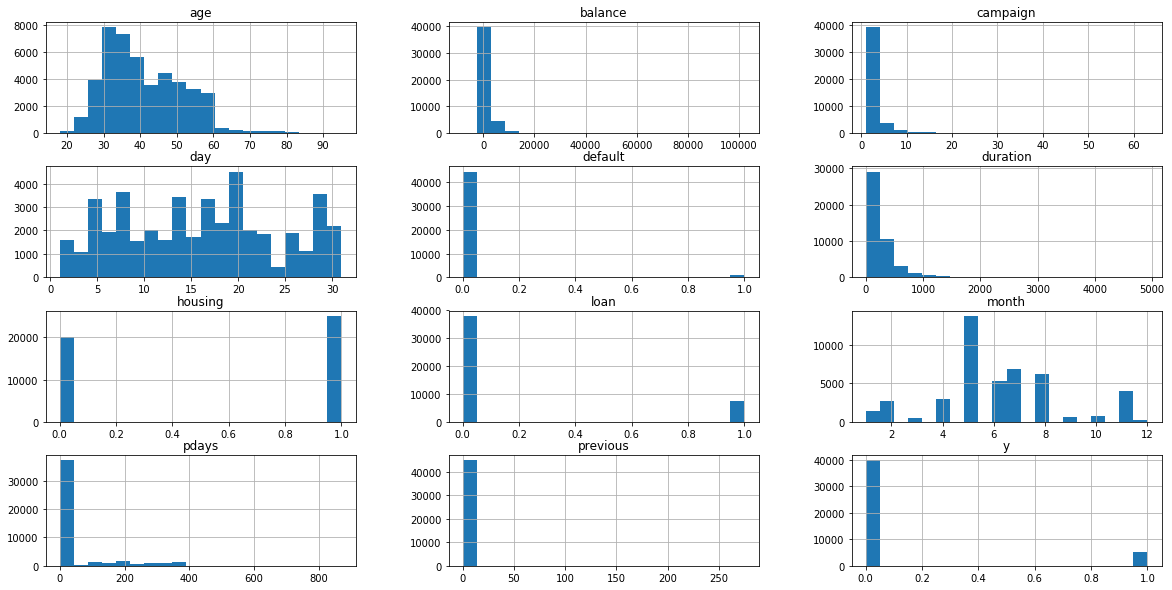

In [5]:
bank.hist(bins=20, figsize=(20,10));

### Plot the probability of subscribing the deposit by every categorical feature. Plot also the count of every category

job
===


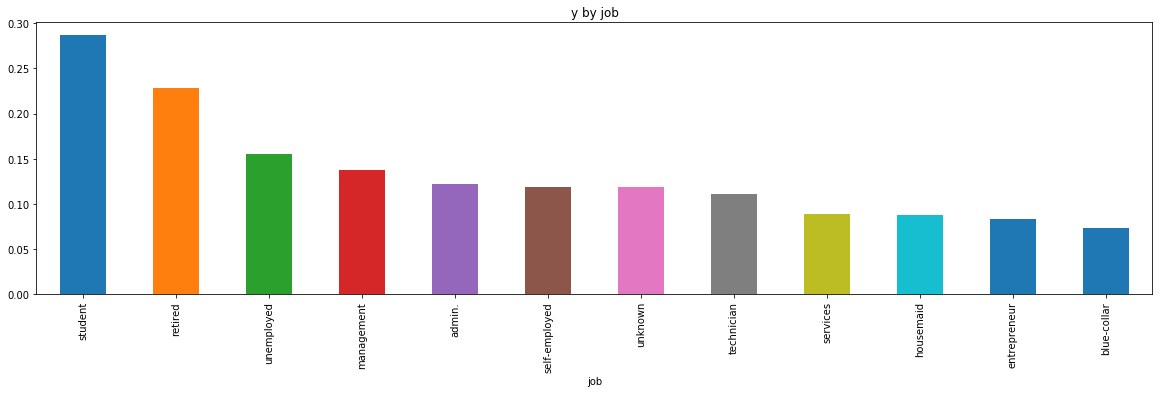

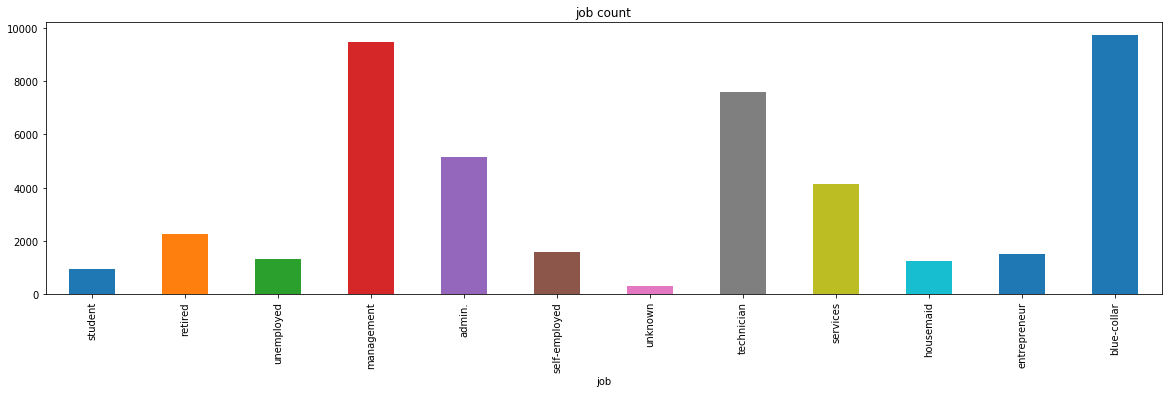

marital


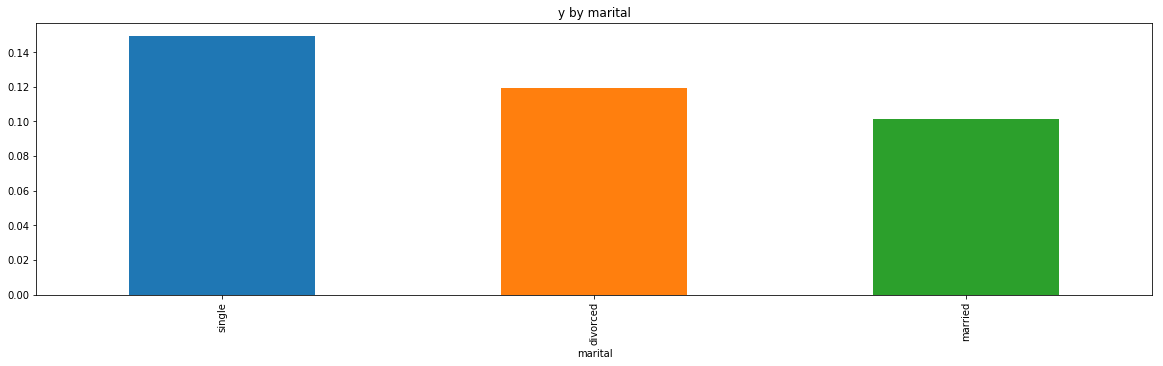

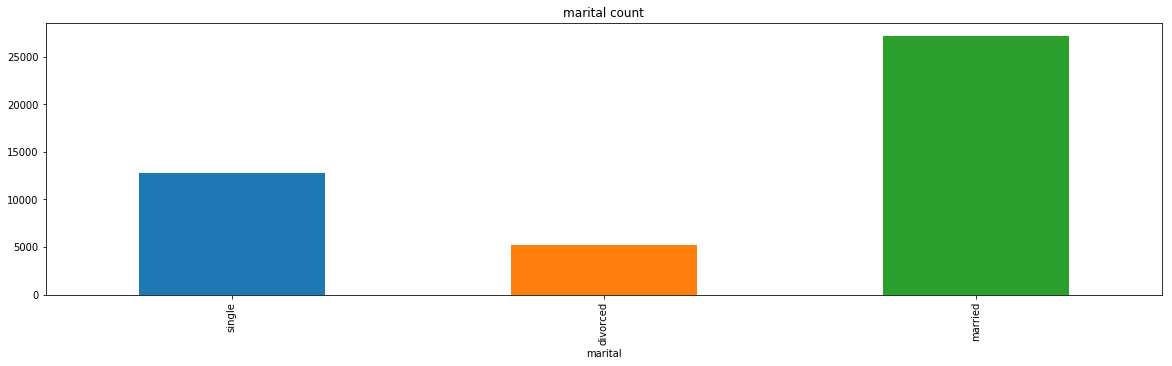

education


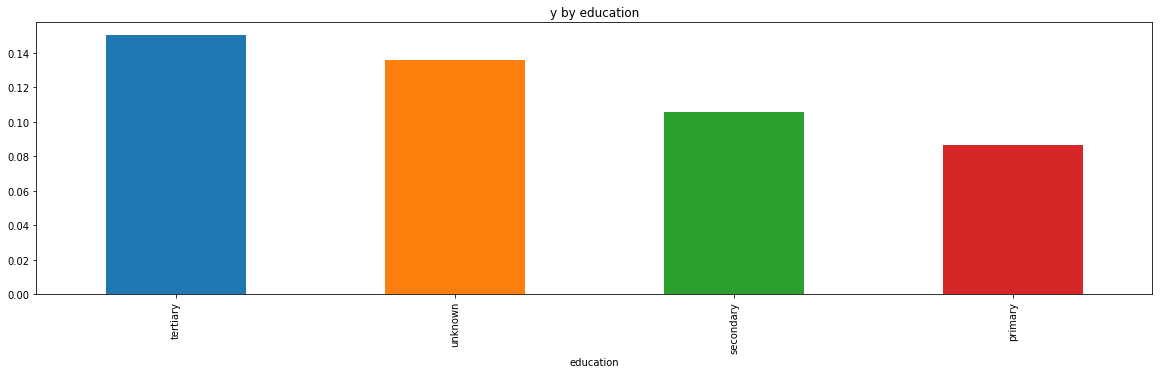

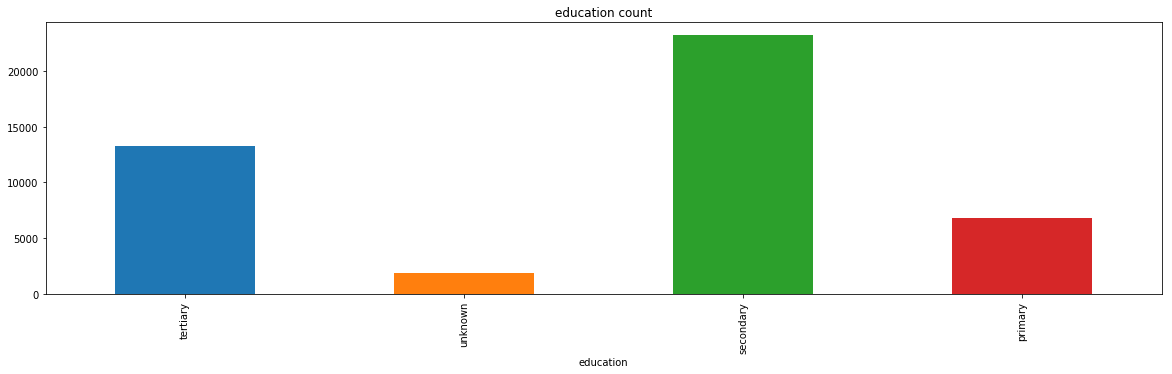

default


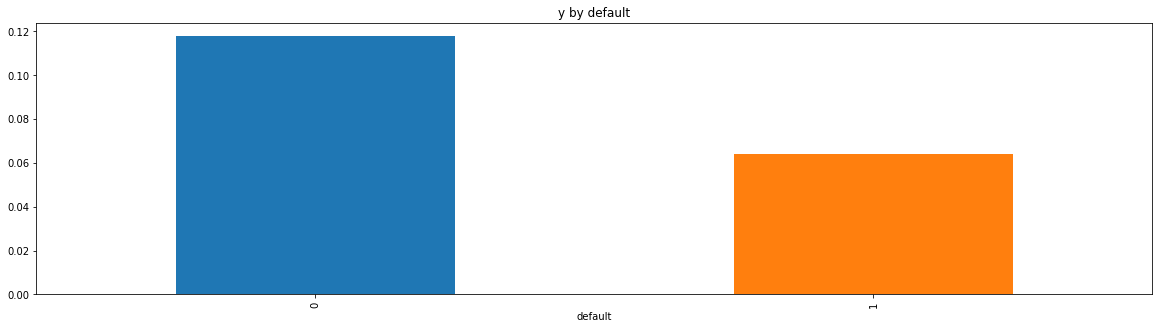

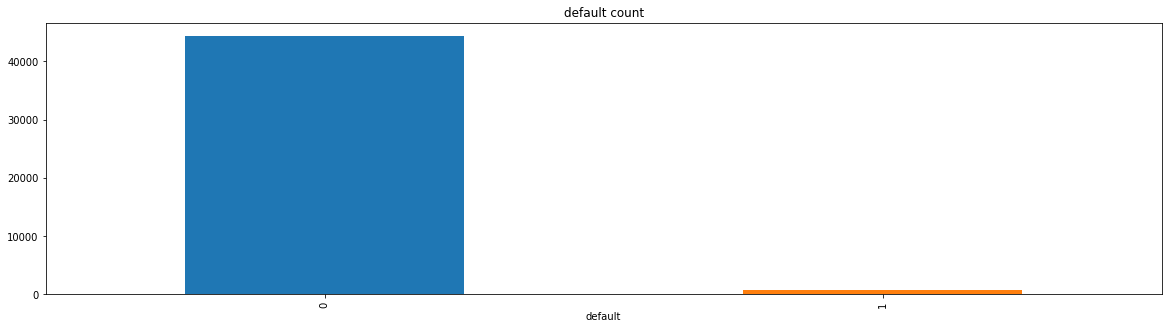

housing


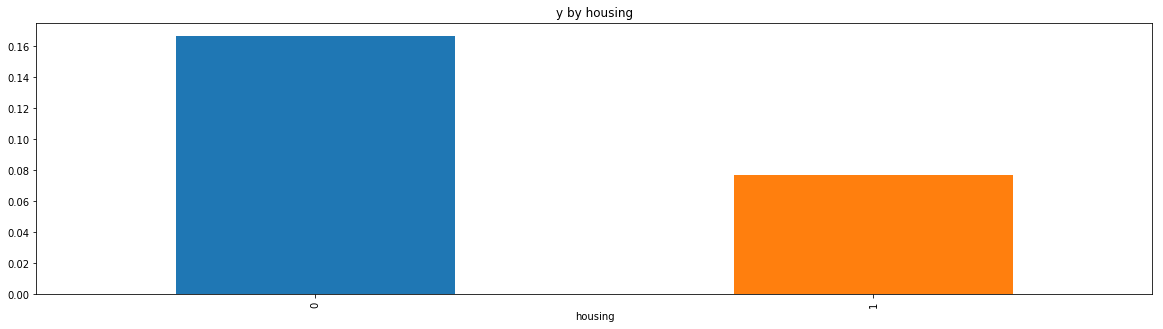

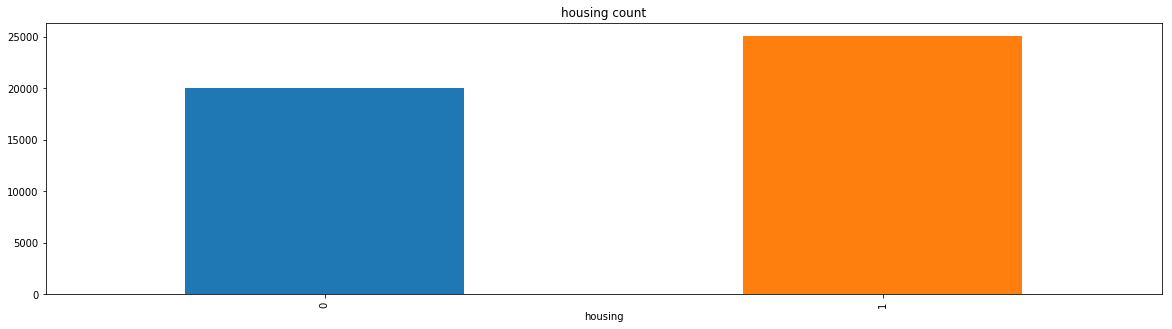

loan
====


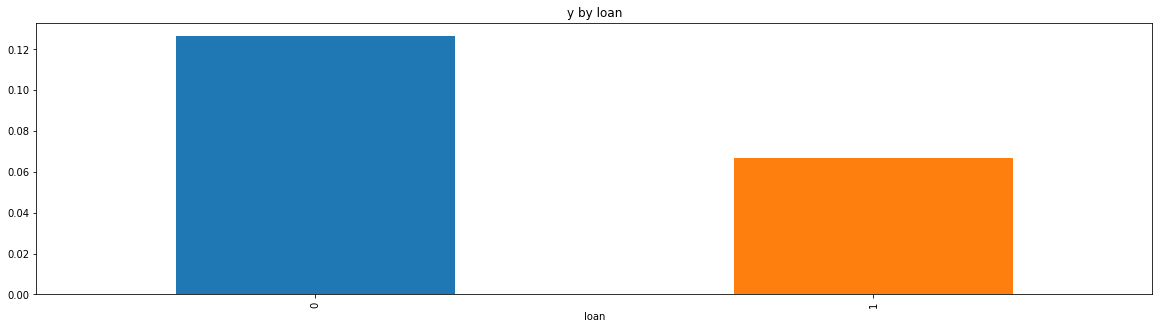

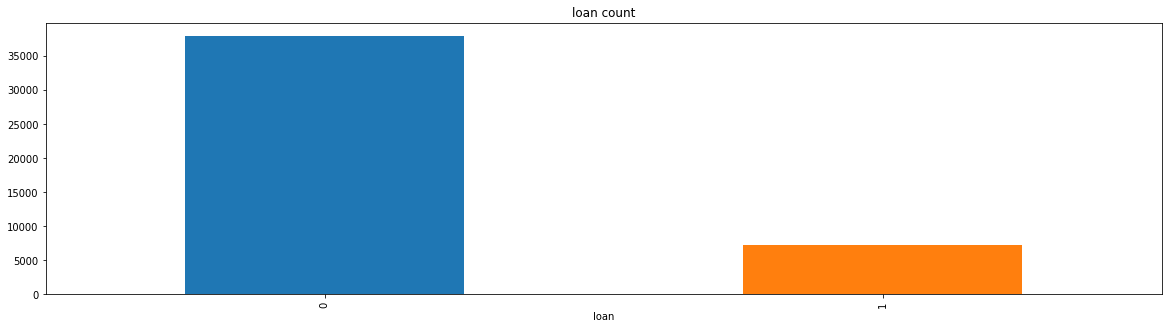

contact


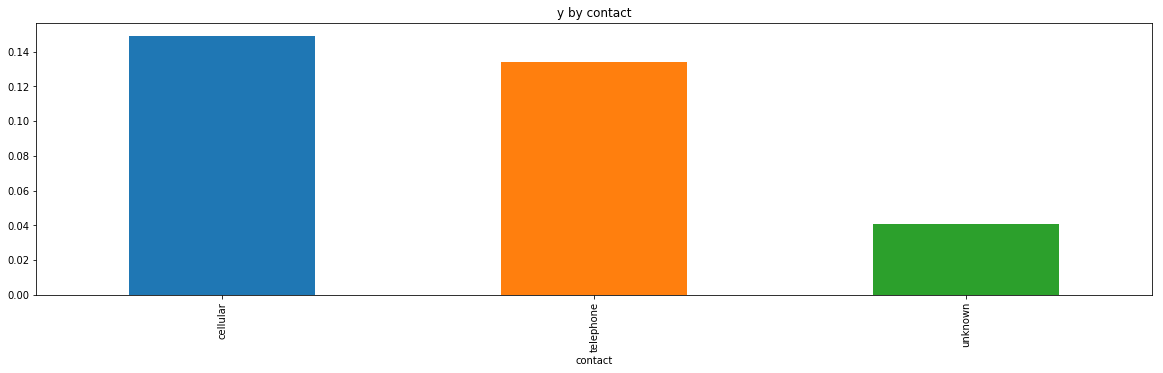

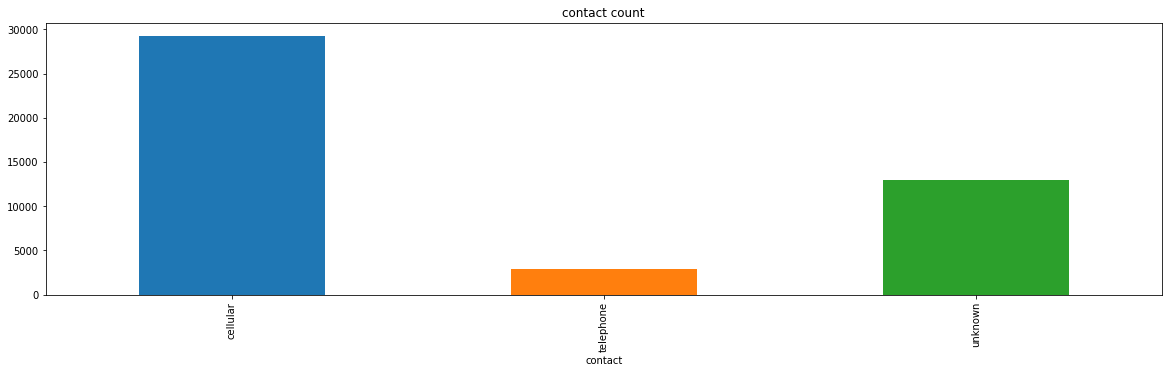

month
=====


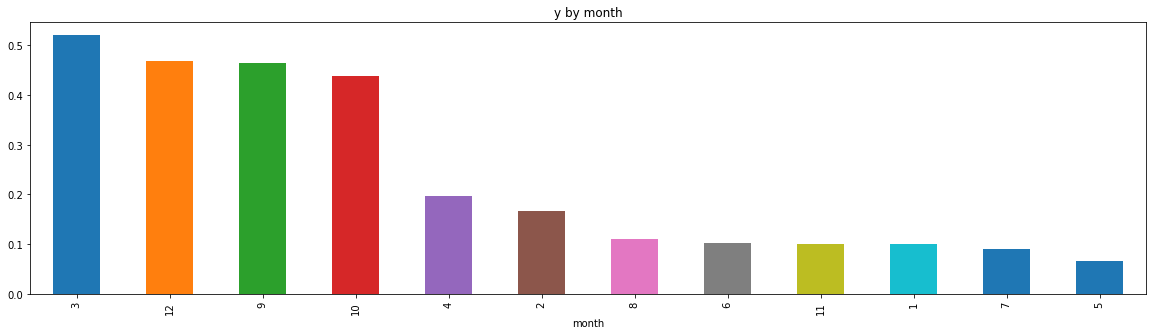

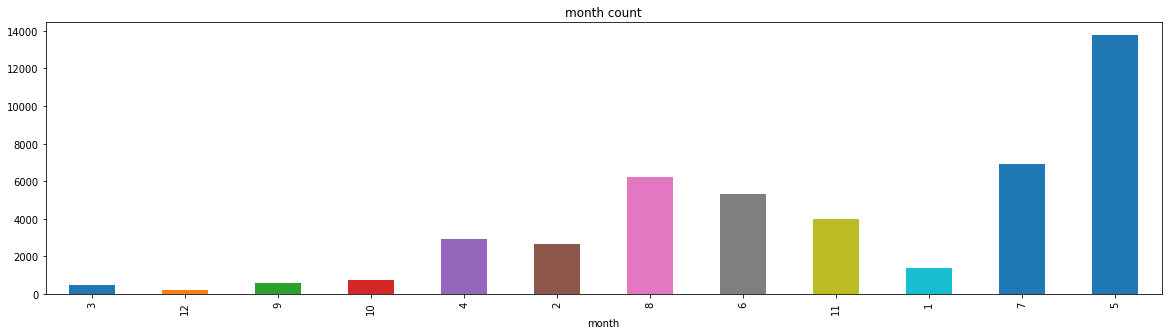

poutcome


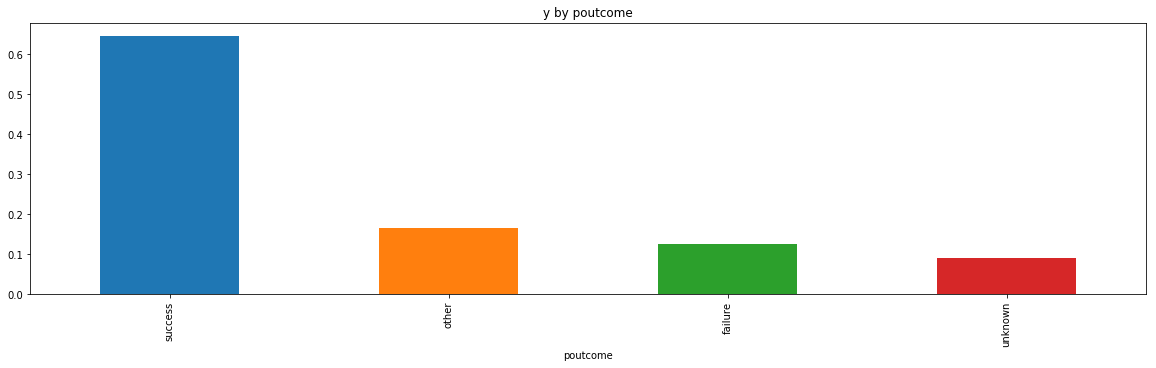

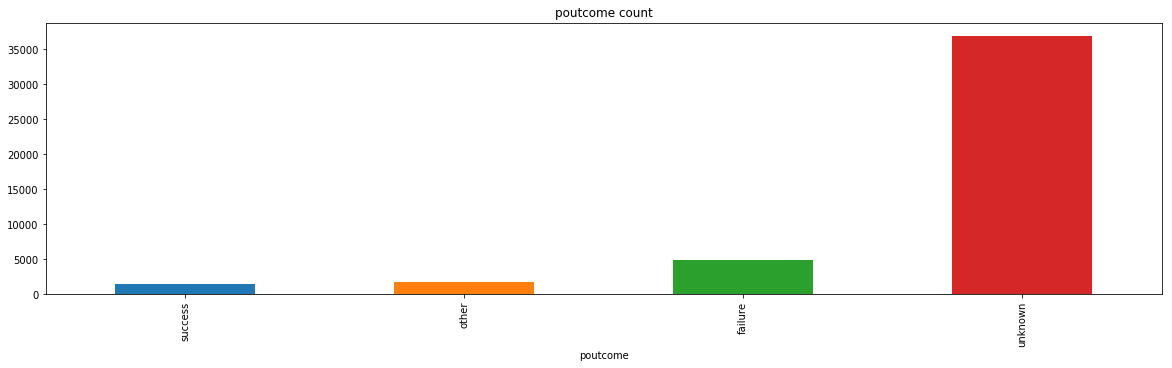

In [6]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for f in categorical_features:
    #display(HTML('<h3>' + f + '</h3'))
    print(f)
    print('=' * len(f))
    group = bank.groupby(f)['y'].mean().sort_values(ascending=False)
    labels = group.index.tolist()
    group.plot(kind='bar', figsize=(20,5), title='y by ' + f);
    plt.show()
    bank.groupby(f)['y'].count()[labels].plot(kind='bar', figsize=(20,5), title=f + ' count');
    plt.show()
    #display(HTML('<br>'))

### Let's now analyze the correlation to numerical features

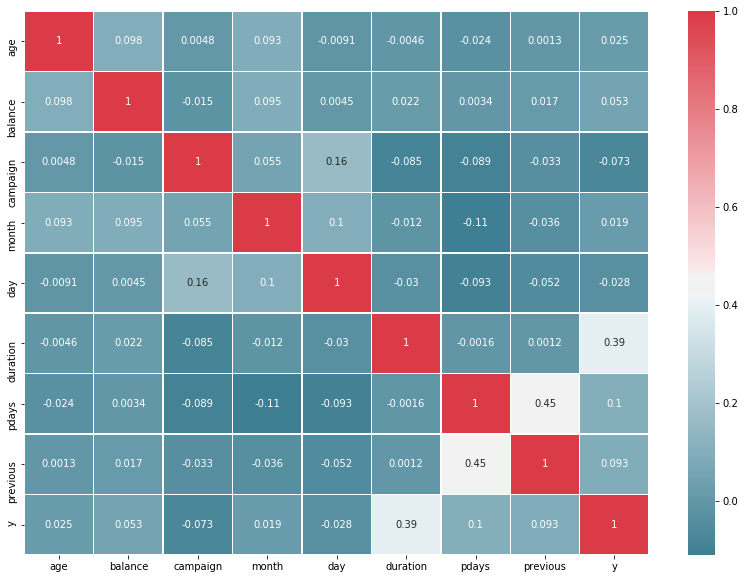

In [7]:
numerical_features = ['age', 'balance', 'campaign', 'month', 'day', 'duration', 'pdays', 'previous']
numerical_features_y = numerical_features + ['y']
plt.figure(figsize=(14,10))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(bank[numerical_features_y].corr(), cmap=cmap, annot=True, linewidths=.5);


In [8]:
bank[numerical_features].corrwith(bank['y']).sort_values(ascending=False)

duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
month       0.018717
day        -0.028348
campaign   -0.073172
dtype: float64

## Encode categorical features

In [9]:
bank = pd.get_dummies(bank)

In [10]:
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [11]:
def make_train_test():
    features = bank.columns.tolist()
    features.remove('y')
    X = bank[features]
    y = bank['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y, random_state=42)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    y_train = pd.DataFrame(y_train, columns=['y'])
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_test = pd.DataFrame(y_test, columns=['y'])
    train = pd.concat((X_train, y_train), axis=1)
    test = pd.concat((X_test, y_test), axis=1)
    return train, test
    
train, test = make_train_test()
features = train.columns.tolist()
features.remove('y')
#features.remove('duration')

In [12]:
def get_f1_test(model, features):
    model.fit(train[features], train['y'].values)
    y_pred_test = model.predict(test[features])
    return f1_score(y_pred=y_pred_test, y_true=test['y']) 

def evaluate_model(model, features):
    model.fit(train[features], train['y'].values)
    y_pred_train = model.predict(train[features])
    y_pred_test = model.predict(test[features])

    accuracy_train = accuracy_score(y_pred=y_pred_train, y_true=train['y'])
    precision_train = precision_score(y_pred=y_pred_train, y_true=train['y'])
    recall_train = recall_score(y_pred=y_pred_train, y_true=train['y'])
    f1_train = f1_score(y_pred=y_pred_train, y_true=train['y'])

    accuracy_test = accuracy_score(y_pred=y_pred_test, y_true=test['y'])
    precision_test = precision_score(y_pred=y_pred_test, y_true=test['y'])
    recall_test = recall_score(y_pred=y_pred_test, y_true=test['y'])
    f1_test = f1_score(y_pred=y_pred_test, y_true=test['y'])

    print('TRAIN: precision: ' + str(round(precision_train,3)) + 
          ', recall: ' + str(round(recall_train, 3)) + ', f1: ' + str(round(f1_train, 3)) )
    print('TEST:  precision: ' + str(round(precision_test,3)) +
          ', recall: ' + str(round(recall_test, 3)) + ', f1: ' + str(round(f1_test, 3)) )
    
    #print('TRAIN: accuracy: ' + str(round(accuracy_train,3)) + ', precision: ' + str(round(precision_train,3)) + 
    #      ', recall: ' + str(round(recall_train, 3)) + ', f1: ' + str(round(f1_train, 3)) )
    #print('TEST:  accuracy: ' + str(round(accuracy_test,3)) + ', precision: ' + str(round(precision_test,3)) +
    #      ', recall: ' + str(round(recall_test, 3)) + ', f1: ' + str(round(f1_test, 3)) )
    print()
    print('Confusion Matrix Test Set')
    print(pd.crosstab(test['y'], y_pred_test, rownames=['actual'], colnames=['preds']))
    print()
    
    #fpr, tpr, _ = roc_curve(test['y'], y_pred_test)
    #roc_auc = auc(fpr, tpr)
    #print('AUC: ' + str(roc_auc))
    #print()
    
def get_features_importances(model, features=features):
    print('Features Importance')
    idx = reversed(np.argsort(model.feature_importances_))
    for i in idx:
        importance = round(model.feature_importances_[i], 3)
        if importance > 0.01:
            print(train.columns[i] + ': ' + str(importance))

## Baseline

Let's create a dummy classifier that randomly generates outputs with the same probability distribution as the training data

In [13]:
dummy_stratified = DummyClassifier(strategy='stratified', random_state=42)
evaluate_model(dummy_stratified, features)

TRAIN: precision: 0.117, recall: 0.116, f1: 0.117
TEST:  precision: 0.109, recall: 0.105, f1: 0.107

Confusion Matrix Test Set
preds      0     1
actual            
0       8845  1136
1       1183   139



## Machine Learning

### Decision Tree

In [14]:
tree = DecisionTreeClassifier(random_state=42)
evaluate_model(tree, features)
get_features_importances(tree)

TRAIN: precision: 1.0, recall: 1.0, f1: 1.0
TEST:  precision: 0.479, recall: 0.477, f1: 0.478

Confusion Matrix Test Set
preds      0    1
actual           
0       9295  686
1        692  630

Features Importance
duration: 0.282
balance: 0.109
day: 0.092
poutcome_success: 0.089
age: 0.089
month: 0.079
pdays: 0.045
campaign: 0.035
housing: 0.017
contact_unknown: 0.013
previous: 0.012


#### Regularization

If not constrained (regularized) the tree will overfit the data
This you can notice because of the perfect TRAIN performance and poor (but much better than baseline) TEST performance

In [15]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
evaluate_model(tree, features)
get_features_importances(tree)

TRAIN: precision: 0.675, recall: 0.35, f1: 0.461
TEST:  precision: 0.636, recall: 0.331, f1: 0.436

Confusion Matrix Test Set
preds      0    1
actual           
0       9730  251
1        884  438

Features Importance
duration: 0.578
poutcome_success: 0.294
age: 0.051
contact_unknown: 0.04
month: 0.018


##### Let's find the best depth

In [16]:
def get_f1_max_depth(max_depth, features=features, class_weight=None):
    f1s = []
    for depth in range(2,max_depth):
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight=class_weight)
        f1s.append(get_f1_test(tree, features))
    plt.plot(range(2,max_depth), f1s, label='F1 score testing')
    plt.title('F1 score as max_depth varies')
    plt.legend()
    plt.show()
    print('best: max_depth=' + str(2 + np.argmax(f1s)) + ', f1: ' + str(np.max(f1s)))

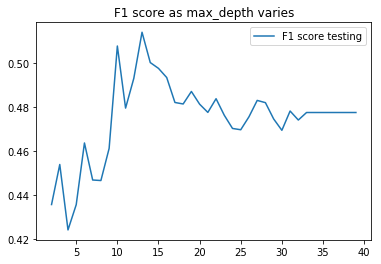

best: max_depth=13, f1: 0.5142385472554685


In [17]:
get_f1_max_depth(40)

In [18]:
tree = DecisionTreeClassifier(max_depth=13, random_state=42)
evaluate_model(tree, features)
#get_features_importances(tree)

TRAIN: precision: 0.841, recall: 0.699, f1: 0.763
TEST:  precision: 0.566, recall: 0.471, f1: 0.514

Confusion Matrix Test Set
preds      0    1
actual           
0       9503  478
1        699  623



#### Let's account for the fact we have an imlanced output (after all, most people decide not to subscribe the deposit)

we can do this by adding *class_weight='balanced'*

In [19]:
tree = DecisionTreeClassifier(max_depth=13, class_weight='balanced', random_state=42)
evaluate_model(tree, features)
get_features_importances(tree)

TRAIN: precision: 0.523, recall: 0.963, f1: 0.678
TEST:  precision: 0.417, recall: 0.761, f1: 0.539

Confusion Matrix Test Set
preds      0     1
actual            
0       8573  1408
1        316  1006

Features Importance
duration: 0.392
month: 0.132
poutcome_success: 0.111
day: 0.088
contact_unknown: 0.071
housing: 0.044
balance: 0.037
age: 0.034
pdays: 0.021
campaign: 0.012


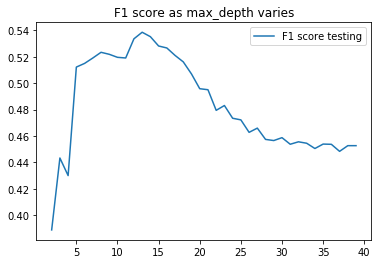

best: max_depth=13, f1: 0.5385438972162742


In [20]:
get_f1_max_depth(40, class_weight='balanced')

### Random Forest

In [21]:
rf = RandomForestClassifier(max_depth=13, class_weight='balanced', n_estimators=50, random_state=42)
evaluate_model(rf, features)
get_features_importances(rf)

TRAIN: precision: 0.596, recall: 0.943, f1: 0.73
TEST:  precision: 0.478, recall: 0.75, f1: 0.584

Confusion Matrix Test Set
preds      0     1
actual            
0       8898  1083
1        330   992

Features Importance
duration: 0.417
month: 0.073
age: 0.056
balance: 0.054
day: 0.051
poutcome_success: 0.05
pdays: 0.038
contact_unknown: 0.037
housing: 0.034
contact_cellular: 0.026
previous: 0.024
campaign: 0.023
poutcome_unknown: 0.012


### Let's inspect a smaller tree

In [22]:
tree = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
evaluate_model(tree, features)
get_features_importances(tree)

TRAIN: precision: 0.317, recall: 0.802, f1: 0.454
TEST:  precision: 0.309, recall: 0.784, f1: 0.443

Confusion Matrix Test Set
preds      0     1
actual            
0       7665  2316
1        286  1036

Features Importance
duration: 0.641
poutcome_success: 0.176
contact_unknown: 0.111
month: 0.071


In [23]:
export_graphviz(tree, out_file ="bank.dot", feature_names = features, class_names=['no','yes'], rounded = True, filled = True, proportion=True)

![Decision Tree with max_depth=3](img/bank_tree.jpeg)

## Conclusion

### We just need to keep the conversation going for as long as possible ...


**But** Correlation does not implies Causation

![But Correlation is not Causation](img/correlation_not_causation.jpg)

Image Credit: xkcd - https://xkcd.com/552

### Even if correlation does not imply causation ... it doesn't hurt not being the first saying goodbye

## We cannot conclude yet !
### We got some insights, but if we really want to predict, we cannot use data from *this* campaign
### Let's restrict ourselves to make use of previous campaign data only
This means that we cannot use the following features:
* contact: contact communication type (categorical: "unknown","telephone","cellular") 
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* **duration**: last contact duration, in seconds (numeric)

### Take out the features about this campaign

In [24]:
contact_features = [f for f in features if f.startswith('contact')]
new_campaign_features = features.copy()
for f in contact_features:
    new_campaign_features.remove(f)
new_campaign_features.remove('day')
new_campaign_features.remove('month')
new_campaign_features.remove('duration')


### Train a tree

In [25]:
tree = DecisionTreeClassifier(max_depth=13, class_weight='balanced', random_state=42)
evaluate_model(tree, new_campaign_features)
get_features_importances(tree, features=new_campaign_features)

TRAIN: precision: 0.324, recall: 0.675, f1: 0.437
TEST:  precision: 0.241, recall: 0.509, f1: 0.327

Confusion Matrix Test Set
preds      0     1
actual            
0       7864  2117
1        649   673

Features Importance
education_unknown: 0.24
balance: 0.195
age: 0.14
housing: 0.096
month: 0.087
day: 0.052
duration: 0.026
job_unemployed: 0.019
loan: 0.016
pdays: 0.014
marital_divorced: 0.013
marital_single: 0.012
job_management: 0.011
job_blue-collar: 0.011


### Get the optimal depth for maximizing F1 score

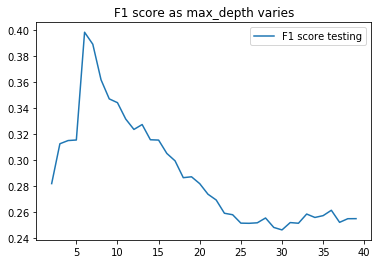

best: max_depth=6, f1: 0.3984063745019921


In [26]:
get_f1_max_depth(40, features=new_campaign_features, class_weight='balanced')

### Evaluate the tree with the optimal depth

In [27]:
tree = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
evaluate_model(tree, new_campaign_features)
get_features_importances(tree, features=new_campaign_features)

TRAIN: precision: 0.382, recall: 0.421, f1: 0.401
TEST:  precision: 0.382, recall: 0.416, f1: 0.398

Confusion Matrix Test Set
preds      0    1
actual           
0       9092  889
1        772  550

Features Importance
education_unknown: 0.445
housing: 0.177
age: 0.144
balance: 0.097
month: 0.087
job_unemployed: 0.026
day: 0.013


### Evaluate the random forests with the optimal depth

In [28]:
rf = RandomForestClassifier(max_depth=6, class_weight='balanced', n_estimators=50, random_state=42)
evaluate_model(rf, new_campaign_features)
get_features_importances(rf, features=new_campaign_features)

TRAIN: precision: 0.304, recall: 0.537, f1: 0.388
TEST:  precision: 0.295, recall: 0.523, f1: 0.378

Confusion Matrix Test Set
preds      0     1
actual            
0       8329  1652
1        630   692

Features Importance
education_unknown: 0.196
housing: 0.13
month: 0.117
age: 0.108
balance: 0.08
contact_cellular: 0.079
duration: 0.067
day: 0.036
education_secondary: 0.032
job_unemployed: 0.027
loan: 0.022
job_unknown: 0.018
pdays: 0.016
job_retired: 0.016
job_entrepreneur: 0.015
marital_single: 0.011


A word about using validation set ... if we still have time